In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.notebook_repr_html", False)  # disable "rich" output
plt.style.use("seaborn")

## Missing Values

In [2]:
nhanes = pd.read_csv("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/nhanes_p_demo_bmx_2020.csv",
    comment="#")
nhanes.head(3)

     SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
0  109263         4    NaN    NaN       NaN       NaN      NaN      NaN   
1  109264         1   42.2    NaN       NaN       NaN      NaN      NaN   
2  109265         1   12.0    NaN      91.6       NaN      NaN      NaN   

   BMXHT  BMIHT  ...  FIAINTRP  MIALANG  MIAPROXY  MIAINTRP  AIALANGA  \
0    NaN    NaN  ...       2.0      NaN       NaN       NaN       NaN   
1  154.7    NaN  ...       2.0      1.0       2.0       2.0       1.0   
2   89.3    NaN  ...       2.0      NaN       NaN       NaN       NaN   

       WTINTPRP      WTMECPRP  SDMVPSU  SDMVSTRA  INDFMPIR  
0   7891.762435   8951.815567        3       156      4.66  
1  11689.747264  12271.157043        1       155      0.83  
2  16273.825939  16658.764203        1       157      3.06  

[3 rows x 50 columns]

In [3]:
nhanes.loc[:,"BMXWT"].shape

(14300,)

In [4]:
nhanes.loc[:,"BMXWT"].count()

14075

In [5]:
nhanes.loc[:,"BMXWT"].isna()

0         True
1        False
2        False
3        False
4        False
         ...  
14295    False
14296    False
14297    False
14298    False
14299    False
Name: BMXWT, Length: 14300, dtype: bool

In [9]:
nhanes.loc[ ~nhanes.loc[:,"BMXWT"].isna(),:]#records for column BMXWT not null

         SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
1      109264         1   42.2    NaN       NaN       NaN      NaN      NaN   
2      109265         1   12.0    NaN      91.6       NaN      NaN      NaN   
3      109266         1   97.1    NaN       NaN       NaN      NaN      NaN   
4      109269         3   13.6    NaN      90.9       NaN      NaN      NaN   
5      109270         1   75.3    NaN       NaN       NaN      NaN      NaN   
...       ...       ...    ...    ...       ...       ...      ...      ...   
14295  124818         1  108.8    NaN       NaN       NaN      NaN      NaN   
14296  124819         1   15.4    NaN      94.9       NaN      NaN      NaN   
14297  124820         1   22.9    NaN       NaN       NaN      NaN      NaN   
14298  124821         1   79.5    NaN       NaN       NaN      NaN      NaN   
14299  124822         1   59.7    NaN       NaN       NaN      NaN      NaN   

       BMXHT  BMIHT  ...  FIAINTRP  MIALANG  MIAPRO

In [11]:
nhanes.loc[ (~nhanes.loc[:,"BMXWT"].isna()) & (~nhanes.loc[:,"BMXHT"].isna()),:]#records for column BMXWT,BMXHT not null

         SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
1      109264         1   42.2    NaN       NaN       NaN      NaN      NaN   
2      109265         1   12.0    NaN      91.6       NaN      NaN      NaN   
3      109266         1   97.1    NaN       NaN       NaN      NaN      NaN   
5      109270         1   75.3    NaN       NaN       NaN      NaN      NaN   
6      109271         1   98.8    NaN       NaN       NaN      NaN      NaN   
...       ...       ...    ...    ...       ...       ...      ...      ...   
14295  124818         1  108.8    NaN       NaN       NaN      NaN      NaN   
14296  124819         1   15.4    NaN      94.9       NaN      NaN      NaN   
14297  124820         1   22.9    NaN       NaN       NaN      NaN      NaN   
14298  124821         1   79.5    NaN       NaN       NaN      NaN      NaN   
14299  124822         1   59.7    NaN       NaN       NaN      NaN      NaN   

       BMXHT  BMIHT  ...  FIAINTRP  MIALANG  MIAPRO

In [12]:
nhanes.loc[:,"BMXWT"].mean()#ignores missing values

65.42638010657159

In [ ]:
nhanes.dropna() #removes all rows having missing values. 

In [13]:
nhanes.dropna(subset = ["BMXWT","BMXHT"]) #removes all rows having missing values  for the two columns. 

         SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
1      109264         1   42.2    NaN       NaN       NaN      NaN      NaN   
2      109265         1   12.0    NaN      91.6       NaN      NaN      NaN   
3      109266         1   97.1    NaN       NaN       NaN      NaN      NaN   
5      109270         1   75.3    NaN       NaN       NaN      NaN      NaN   
6      109271         1   98.8    NaN       NaN       NaN      NaN      NaN   
...       ...       ...    ...    ...       ...       ...      ...      ...   
14295  124818         1  108.8    NaN       NaN       NaN      NaN      NaN   
14296  124819         1   15.4    NaN      94.9       NaN      NaN      NaN   
14297  124820         1   22.9    NaN       NaN       NaN      NaN      NaN   
14298  124821         1   79.5    NaN       NaN       NaN      NaN      NaN   
14299  124822         1   59.7    NaN       NaN       NaN      NaN      NaN   

       BMXHT  BMIHT  ...  FIAINTRP  MIALANG  MIAPRO

In [15]:
nhanes.dropna(subset = ["BMXWT","BMXHT"]).shape

(13137, 50)

In [16]:
nhanes_na_stats = nhanes.isna().apply([np.sum, np.mean]).T
nhanes_na_stats.nlargest(5, "sum")

#here are the counts and proportions of missing values in each column (we will display only the top 5 columns

              sum      mean
BMIHEAD   14300.0  1.000000
BMIRECUM  14257.0  0.996993
BMIHT     14129.0  0.988042
BMXHEAD   13990.0  0.978322
BMIHIP    13924.0  0.973706

In [23]:
groups = nhanes.groupby("BMXWT").groups

In [24]:
groups

{3.2: [14177], 3.5: [12935], 3.6: [1298], 3.7: [6818], 3.8: [878, 1191, 5800, 11683], 3.9: [4118, 4456, 7457, 9870, 12182, 14133], 4.0: [2920, 4056, 9569, 11210, 12183], 4.1: [558, 2238], 4.2: [16, 3513, 4403, 6183, 6243, 8386, 11005], 4.3: [2422, 3711, 8703, 10495], 4.4: [713, 7177, 11096, 12916], 4.5: [6327, 12024, 13941], 4.6: [11, 6636, 12094], 4.7: [549, 1214, 1936, 8283, 11272, 11287], 4.8: [210, 1007, 2080, 2617, 2668, 6685, 7846, 8125, 8561], 4.9: [931, 4843, 6580, 8464, 11094, 11192], 5.0: [3325, 4059, 4166, 8690, 8847, 9988, 11778, 12431], 5.1: [2085, 5462, 7961, 12736], 5.2: [2160, 2475, 5289, 6157, 9475, 13245], 5.3: [111, 2098, 12480, 12883, 14278], 5.4: [2880, 3347, 12264, 12668, 14042, 14180], 5.5: [2401, 4187, 6229, 7746, 9396, 11326, 11462, 11588, 12645, 13576], 5.6: [3584, 4912, 5841, 6033, 8466, 13161], 5.7: [6939, 9358, 11159, 14114], 5.8: [183, 2496, 3510, 8821, 9286, 11403, 12034, 13159], 5.9: [316, 2459, 3496, 6075, 9417, 9947, 10078, 12544], 6.0: [933, 1998, 281

In [ ]:
#to read data in group by "specifically done for categorical data
for group_name, group_data in nhanes.groupby("BMXWT"):
    print(f"Group: {group_name}")
    print(group_data)

In [26]:
grouped_data = nhanes.groupby("BMXWT").apply(lambda x: x)
print(grouped_data)

         SEQN  BMDSTATS  BMXWT  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  \
1      109264         1   42.2    NaN       NaN       NaN      NaN      NaN   
2      109265         1   12.0    NaN      91.6       NaN      NaN      NaN   
3      109266         1   97.1    NaN       NaN       NaN      NaN      NaN   
4      109269         3   13.6    NaN      90.9       NaN      NaN      NaN   
5      109270         1   75.3    NaN       NaN       NaN      NaN      NaN   
...       ...       ...    ...    ...       ...       ...      ...      ...   
14295  124818         1  108.8    NaN       NaN       NaN      NaN      NaN   
14296  124819         1   15.4    NaN      94.9       NaN      NaN      NaN   
14297  124820         1   22.9    NaN       NaN       NaN      NaN      NaN   
14298  124821         1   79.5    NaN       NaN       NaN      NaN      NaN   
14299  124822         1   59.7    NaN       NaN       NaN      NaN      NaN   

       BMXHT  BMIHT  ...  FIAINTRP  MIALANG  MIAPRO

In [27]:
group_sizes = nhanes.groupby("BMXWT").size()
print(group_sizes)

BMXWT
3.2      1
3.5      1
3.6      1
3.7      1
3.8      4
        ..
210.8    1
219.6    1
223.5    1
242.6    1
254.3    1
Length: 1513, dtype: int64


In [28]:
group_count = nhanes.groupby("BMXWT").count()
print(group_count)

       SEQN  BMDSTATS  BMIWT  BMXRECUM  BMIRECUM  BMXHEAD  BMIHEAD  BMXHT  \
BMXWT                                                                       
3.2       1         1      0         1         0        1        0      0   
3.5       1         1      0         1         0        1        0      0   
3.6       1         1      0         1         0        1        0      0   
3.7       1         1      0         1         0        1        0      0   
3.8       4         4      0         4         0        4        0      0   
...     ...       ...    ...       ...       ...      ...      ...    ...   
210.8     1         1      0         0         0        0        0      1   
219.6     1         1      1         0         0        0        0      1   
223.5     1         1      0         0         0        0        0      1   
242.6     1         1      0         0         0        0        0      1   
254.3     1         1      1         0         0        0        0      1   

## Missing Data

### 1. Discarding Nan values

In [ ]:
pandas.DataFrame.dropna
and numpy.isnan or pandas.DataFrame.isna with .loc or .iloc otherwise.

### 2. Mean Imputation

In [31]:
x = nhanes.loc[nhanes.loc[:, "RIDAGEYR"] >= 18, "BMXHT"]

In [33]:
xi = x.copy()
xi[np.isnan(xi)] = np.nanmean(xi)
#replace nan with mean. accordingly can be done by median/mode

In [34]:
xg = x.copy()
g = nhanes.loc[nhanes.loc[:, "RIDAGEYR"] >= 18, "RIAGENDR"]
xg[np.isnan(xg) & (g == 1)] = np.nanmean(xg[g == 1])  # male
xg[np.isnan(xg) & (g == 2)] = np.nanmean(xg[g == 2])  # female

#replace the missing values with the corresponding within-group averages:

In [35]:
xg

3        160.2
6        182.3
8        184.2
9        185.3
17       177.1
         ...  
14292    178.8
14294    147.8
14295    168.7
14298    176.4
14299    167.5
Name: BMXHT, Length: 8965, dtype: float64

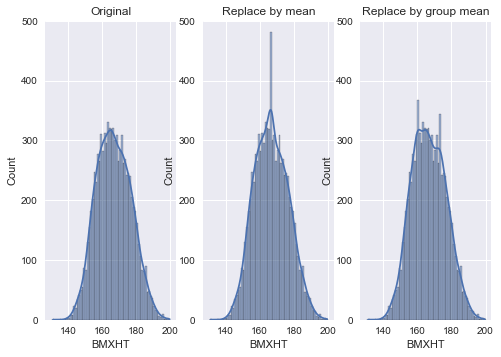

In [38]:
plt.subplot(131)
sns.histplot(x, binwidth=1, binrange=[130, 200], kde=True)
plt.ylim(0, 500)
plt.title("Original")
plt.subplot(132)
sns.histplot(xi, binwidth=1, binrange=[130, 200], kde=True)
plt.ylim(0, 500)
plt.title("Replace by mean")
plt.subplot(133)
sns.histplot(xg, binwidth=1, binrange=[130, 200], kde=True)
plt.ylim(0, 500)
plt.title("Replace by group mean")
plt.show()

In [39]:
import numpy as np

# Example data
x1g1 = np.array([np.nan, 2, 3, np.nan, 5, 6, np.nan])
g1 = np.array([1, 1, 1, 2, 2, 1, 1])

# Replace NaN in group g == 1 with the group mean
x1g1[np.isnan(x1g1) & (g1 == 1)] = np.nanmean(x1g1[g1 == 1])

print(x1g1)

[3.66666667 2.         3.                nan 5.         6.
 3.66666667]


- 1. The missing values (NaN) in xg where g == 1 are replaced with the mean of the non-missing values in group 1 ((2 + 3 + 6) / 3 = 3.6667).
- 2. The NaN in group g == 2 is untouched.

In [ ]:
sklearn.impute.KNNImputer  ##implements missing value imputation based on averaging data from an observation's non-missing neighbours. 
sklearn.impute.IterativeImputer ##where copies of the original datasets are created, missing values are imputed by sampling from some estimated distributions, 
                                 ##inference is made, and then the results are aggregated

### Missing Values in Time Series

The most straightforward ways for dealing with missing values in time series are:

1. forward-fill – propagate the last non-missing observation,
2. backward-fill – get the next non-missing value,
3. linearly interpolate between two adjacent non-missing values, in particular, a single missing value will be replaced by the average of its neighbours.

In [40]:
air = pd.read_csv("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/r/air_quality_1973.csv",
    comment="#")
x = air.loc[:, "Solar.R"].iloc[:12]
pd.DataFrame(dict(
    original=x,
    ffilled=x.fillna(method="ffill"),
    bfilled=x.fillna(method="bfill"),
    interpolated=x.interpolate(method="linear")
))

    original  ffilled  bfilled  interpolated
0      190.0    190.0    190.0    190.000000
1      118.0    118.0    118.0    118.000000
2      149.0    149.0    149.0    149.000000
3      313.0    313.0    313.0    313.000000
4        NaN    313.0    299.0    308.333333
5        NaN    313.0    299.0    303.666667
6      299.0    299.0    299.0    299.000000
7       99.0     99.0     99.0     99.000000
8       19.0     19.0     19.0     19.000000
9      194.0    194.0    194.0    194.000000
10       NaN    194.0    256.0    225.000000
11     256.0    256.0    256.0    256.000000

## Outliers

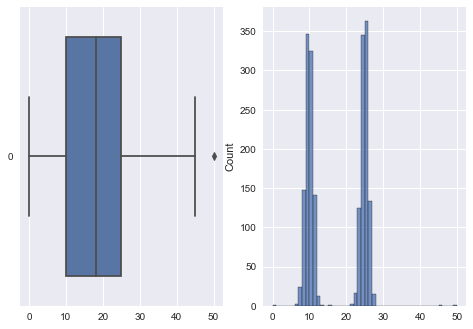

In [41]:
x = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/blobs2.txt")
plt.subplot(121)
sns.boxplot(data=x, orient="h")
plt.subplot(122)
sns.histplot(x, binwidth=1)
plt.show()

### Outliers

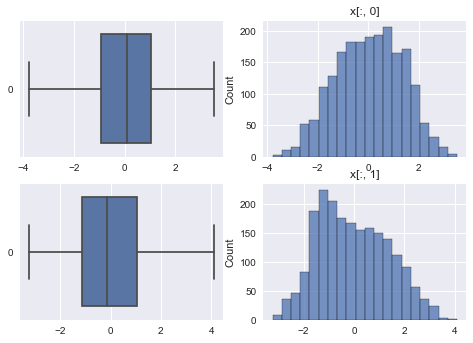

In [42]:
x = np.loadtxt("https://raw.githubusercontent.com/gagolews/" +
    "teaching-data/master/marek/blobs1.txt", delimiter=",")
plt.subplot(221)
sns.boxplot(data=x[:, 0], orient="h")
plt.subplot(222)
sns.histplot(x[:, 0], bins=20)
plt.title("x[:, 0]")
plt.subplot(223)
sns.boxplot(data=x[:, 1], orient="h")
plt.subplot(224)
sns.histplot(x[:, 1], bins=20)
plt.title("x[:, 1]")
plt.show()

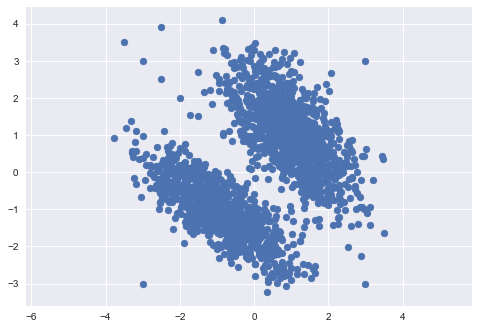

In [43]:
plt.scatter(x[:, 0], x[:, 1])
plt.axis("equal")
plt.show()

In [44]:
x[-8:, :]

array([[-3. ,  3. ],
       [ 3. ,  3. ],
       [ 3. , -3. ],
       [-3. , -3. ],
       [-3.5,  3.5],
       [-2.5,  2.5],
       [-2. ,  2. ],
       [-1.5,  1.5]])

In [45]:
import scipy.spatial
t = scipy.spatial.KDTree(x)
n = t.query_ball_tree(t, 0.2)  # epsilon=0.2 (radius)
c = np.array([len(e) for e in n])
c[[0, 1, -2, -1]]  # preview

array([42, 30,  1,  1])

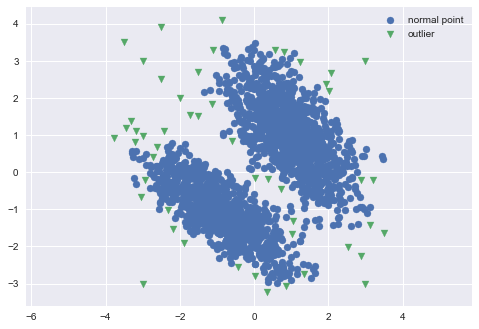

In [46]:
plt.scatter(x[c > 1, 0], x[c > 1, 1], label="normal point")
plt.scatter(x[c == 1, 0], x[c == 1, 1], marker="v", label="outlier")
plt.axis("equal")
plt.legend()
plt.show()

In [47]:
#sklearn.neighbors.LocalOutlierFactor
#sklearn.svm.OneClassSVM
#sklearn.ensemble.IsolationForest